In \[1\]:

    import pandas as pd
    import numpy as np
    from sklearn.cluster import KMeans

In \[2\]:

    df=pd.read_csv("stc-IPTV-Dataset.csv")

In \[3\]:

    df.head()

Out\[3\]:

|     | Unnamed: 0 | date\_     | user_id_maped | program_name         | duration_seconds | program_class | season | episode | program_desc                             | program_genre | series_title | hd  | original_name        |
|-----|------------|------------|---------------|----------------------|------------------|---------------|--------|---------|------------------------------------------|---------------|--------------|-----|----------------------|
| 0   | 1          | 2017-05-27 | 26138         | 100 treets           | 40               | MOVIE         | 0      | 0       | Drama Movie100 Streets                   | Drama         | 0            | 0   | 100 treets           |
| 1   | 3          | 2017-05-21 | 7946          | Moana                | 17               | MOVIE         | 0      | 0       | Animation MovieMoana (HD)                | Animation     | 0            | 1   | Moana                |
| 2   | 4          | 2017-08-10 | 7418          | The Mermaid Princess | 8                | MOVIE         | 0      | 0       | Animation MovieThe Mermaid Princess (HD) | Animation     | 0            | 1   | The Mermaid Princess |
| 3   | 5          | 2017-07-26 | 19307         | The Mermaid Princess | 76               | MOVIE         | 0      | 0       | Animation MovieThe Mermaid Princess (HD) | Animation     | 0            | 1   | The Mermaid Princess |
| 4   | 7          | 2017-07-07 | 15860         | Churchill            | 87               | MOVIE         | 0      | 0       | Biography MovieChurchill (HD)            | Biography     | 0            | 1   | Churchill            |

In \[4\]:

    df.tail()

Out\[4\]:

|         | Unnamed: 0 | date\_     | user_id_maped | program_name                  | duration_seconds | program_class | season | episode | program_desc                                   | program_genre | series_title | hd  | original_name                 |
|---------|------------|------------|---------------|-------------------------------|------------------|---------------|--------|---------|------------------------------------------------|---------------|--------------|-----|-------------------------------|
| 3598602 | 4278700    | 2017-08-22 | 10486         | Table                         | 8                | MOVIE         | 0      | 0       | Comedy MovieTable 19 (HD)                      | Comedy        | 0            | 1   | Table                         |
| 3598603 | 4278701    | 2017-08-22 | 10486         | Newsies: the Broadway Musical | 3                | MOVIE         | 0      | 0       | Family MovieNewsies: the Broadway Musical (HD) | Family        | 0            | 1   | Newsies: the Broadway Musical |
| 3598604 | 4278702    | 2018-01-31 | 3674          | Dragon Ball Z: Resurrection F | 7                | MOVIE         | 0      | 0       | Animation MovieDragon Ball Z: Resurrection F   | Animation     | 0            | 0   | Dragon Ball Z: Resurrection F |
| 3598605 | 4278703    | 2017-09-19 | 717           | Table                         | 97               | MOVIE         | 0      | 0       | Comedy MovieTable 19 (HD)                      | Comedy        | 0            | 1   | Table                         |
| 3598606 | 4278704    | 2017-10-30 | 717           | Unforgettable                 | 95               | MOVIE         | 0      | 0       | Drama MovieUnforgettable (HD)                  | Drama         | 0            | 1   | Unforgettable                 |

In \[5\]:

    df.info

Out\[5\]:

    <bound method DataFrame.info of          Unnamed: 0       date_  user_id_maped  \
    0                 1  2017-05-27          26138   
    1                 3  2017-05-21           7946   
    2                 4  2017-08-10           7418   
    3                 5  2017-07-26          19307   
    4                 7  2017-07-07          15860   
    ...             ...         ...            ...   
    3598602     4278700  2017-08-22          10486   
    3598603     4278701  2017-08-22          10486   
    3598604     4278702  2018-01-31           3674   
    3598605     4278703  2017-09-19            717   
    3598606     4278704  2017-10-30            717   

                               program_name  duration_seconds program_class  \
    0                            100 treets                40         MOVIE   
    1                                Moana                 17         MOVIE   
    2                 The Mermaid Princess                  8         MOVIE   
    3                 The Mermaid Princess                 76         MOVIE   
    4                            Churchill                 87         MOVIE   
    ...                                 ...               ...           ...   
    3598602                         Table                   8         MOVIE   
    3598603  Newsies: the Broadway Musical                  3         MOVIE   
    3598604   Dragon Ball Z: Resurrection F                 7         MOVIE   
    3598605                         Table                  97         MOVIE   
    3598606                  Unforgettable                 95         MOVIE   

             season  episode                                    program_desc  \
    0             0        0                          Drama Movie100 Streets   
    1             0        0                       Animation MovieMoana (HD)   
    2             0        0        Animation MovieThe Mermaid Princess (HD)   
    3             0        0        Animation MovieThe Mermaid Princess (HD)   
    4             0        0                   Biography MovieChurchill (HD)   
    ...         ...      ...                                             ...   
    3598602       0        0                       Comedy MovieTable 19 (HD)   
    3598603       0        0  Family MovieNewsies: the Broadway Musical (HD)   
    3598604       0        0    Animation MovieDragon Ball Z: Resurrection F   
    3598605       0        0                       Comedy MovieTable 19 (HD)   
    3598606       0        0                   Drama MovieUnforgettable (HD)   

            program_genre  series_title  hd                  original_name  
    0               Drama             0   0                     100 treets  
    1           Animation             0   1                          Moana  
    2           Animation             0   1           The Mermaid Princess  
    3           Animation             0   1           The Mermaid Princess  
    4           Biography             0   1                      Churchill  
    ...               ...           ...  ..                            ...  
    3598602        Comedy             0   1                         Table   
    3598603        Family             0   1  Newsies: the Broadway Musical  
    3598604     Animation             0   0  Dragon Ball Z: Resurrection F  
    3598605        Comedy             0   1                         Table   
    3598606         Drama             0   1                  Unforgettable  

    [3598607 rows x 13 columns]>

In \[6\]:

    df.describe

Out\[6\]:

    <bound method NDFrame.describe of          Unnamed: 0       date_  user_id_maped  \
    0                 1  2017-05-27          26138   
    1                 3  2017-05-21           7946   
    2                 4  2017-08-10           7418   
    3                 5  2017-07-26          19307   
    4                 7  2017-07-07          15860   
    ...             ...         ...            ...   
    3598602     4278700  2017-08-22          10486   
    3598603     4278701  2017-08-22          10486   
    3598604     4278702  2018-01-31           3674   
    3598605     4278703  2017-09-19            717   
    3598606     4278704  2017-10-30            717   

                               program_name  duration_seconds program_class  \
    0                            100 treets                40         MOVIE   
    1                                Moana                 17         MOVIE   
    2                 The Mermaid Princess                  8         MOVIE   
    3                 The Mermaid Princess                 76         MOVIE   
    4                            Churchill                 87         MOVIE   
    ...                                 ...               ...           ...   
    3598602                         Table                   8         MOVIE   
    3598603  Newsies: the Broadway Musical                  3         MOVIE   
    3598604   Dragon Ball Z: Resurrection F                 7         MOVIE   
    3598605                         Table                  97         MOVIE   
    3598606                  Unforgettable                 95         MOVIE   

             season  episode                                    program_desc  \
    0             0        0                          Drama Movie100 Streets   
    1             0        0                       Animation MovieMoana (HD)   
    2             0        0        Animation MovieThe Mermaid Princess (HD)   
    3             0        0        Animation MovieThe Mermaid Princess (HD)   
    4             0        0                   Biography MovieChurchill (HD)   
    ...         ...      ...                                             ...   
    3598602       0        0                       Comedy MovieTable 19 (HD)   
    3598603       0        0  Family MovieNewsies: the Broadway Musical (HD)   
    3598604       0        0    Animation MovieDragon Ball Z: Resurrection F   
    3598605       0        0                       Comedy MovieTable 19 (HD)   
    3598606       0        0                   Drama MovieUnforgettable (HD)   

            program_genre  series_title  hd                  original_name  
    0               Drama             0   0                     100 treets  
    1           Animation             0   1                          Moana  
    2           Animation             0   1           The Mermaid Princess  
    3           Animation             0   1           The Mermaid Princess  
    4           Biography             0   1                      Churchill  
    ...               ...           ...  ..                            ...  
    3598602        Comedy             0   1                         Table   
    3598603        Family             0   1  Newsies: the Broadway Musical  
    3598604     Animation             0   0  Dragon Ball Z: Resurrection F  
    3598605        Comedy             0   1                         Table   
    3598606         Drama             0   1                  Unforgettable  

    [3598607 rows x 13 columns]>

In \[7\]:

    df.columns

Out\[7\]:

    Index(['Unnamed: 0', 'date_', 'user_id_maped', 'program_name',
           'duration_seconds', 'program_class', 'season', 'episode',
           'program_desc', 'program_genre', 'series_title', 'hd', 'original_name'],
          dtype='object')

In \[8\]:

    df.shape

Out\[8\]:

    (3598607, 13)

In \[9\]:

    df.size

Out\[9\]:

    46781891

In \[10\]:

    df.isnull

Out\[10\]:

    <bound method DataFrame.isnull of          Unnamed: 0       date_  user_id_maped  \
    0                 1  2017-05-27          26138   
    1                 3  2017-05-21           7946   
    2                 4  2017-08-10           7418   
    3                 5  2017-07-26          19307   
    4                 7  2017-07-07          15860   
    ...             ...         ...            ...   
    3598602     4278700  2017-08-22          10486   
    3598603     4278701  2017-08-22          10486   
    3598604     4278702  2018-01-31           3674   
    3598605     4278703  2017-09-19            717   
    3598606     4278704  2017-10-30            717   

                               program_name  duration_seconds program_class  \
    0                            100 treets                40         MOVIE   
    1                                Moana                 17         MOVIE   
    2                 The Mermaid Princess                  8         MOVIE   
    3                 The Mermaid Princess                 76         MOVIE   
    4                            Churchill                 87         MOVIE   
    ...                                 ...               ...           ...   
    3598602                         Table                   8         MOVIE   
    3598603  Newsies: the Broadway Musical                  3         MOVIE   
    3598604   Dragon Ball Z: Resurrection F                 7         MOVIE   
    3598605                         Table                  97         MOVIE   
    3598606                  Unforgettable                 95         MOVIE   

             season  episode                                    program_desc  \
    0             0        0                          Drama Movie100 Streets   
    1             0        0                       Animation MovieMoana (HD)   
    2             0        0        Animation MovieThe Mermaid Princess (HD)   
    3             0        0        Animation MovieThe Mermaid Princess (HD)   
    4             0        0                   Biography MovieChurchill (HD)   
    ...         ...      ...                                             ...   
    3598602       0        0                       Comedy MovieTable 19 (HD)   
    3598603       0        0  Family MovieNewsies: the Broadway Musical (HD)   
    3598604       0        0    Animation MovieDragon Ball Z: Resurrection F   
    3598605       0        0                       Comedy MovieTable 19 (HD)   
    3598606       0        0                   Drama MovieUnforgettable (HD)   

            program_genre  series_title  hd                  original_name  
    0               Drama             0   0                     100 treets  
    1           Animation             0   1                          Moana  
    2           Animation             0   1           The Mermaid Princess  
    3           Animation             0   1           The Mermaid Princess  
    4           Biography             0   1                      Churchill  
    ...               ...           ...  ..                            ...  
    3598602        Comedy             0   1                         Table   
    3598603        Family             0   1  Newsies: the Broadway Musical  
    3598604     Animation             0   0  Dragon Ball Z: Resurrection F  
    3598605        Comedy             0   1                         Table   
    3598606         Drama             0   1                  Unforgettable  

    [3598607 rows x 13 columns]>

In \[13\]:

    # Preprocessing
    # Drop missing values
    df.dropna(inplace=True)

In \[14\]:

    df

Out\[14\]:

|         | Unnamed: 0 | date\_     | user_id_maped | program_name                  | duration_seconds | program_class | season | episode | program_desc                                   | program_genre | series_title | hd  | original_name                 |
|---------|------------|------------|---------------|-------------------------------|------------------|---------------|--------|---------|------------------------------------------------|---------------|--------------|-----|-------------------------------|
| 0       | 1          | 2017-05-27 | 26138         | 100 treets                    | 40               | MOVIE         | 0      | 0       | Drama Movie100 Streets                         | Drama         | 0            | 0   | 100 treets                    |
| 1       | 3          | 2017-05-21 | 7946          | Moana                         | 17               | MOVIE         | 0      | 0       | Animation MovieMoana (HD)                      | Animation     | 0            | 1   | Moana                         |
| 2       | 4          | 2017-08-10 | 7418          | The Mermaid Princess          | 8                | MOVIE         | 0      | 0       | Animation MovieThe Mermaid Princess (HD)       | Animation     | 0            | 1   | The Mermaid Princess          |
| 3       | 5          | 2017-07-26 | 19307         | The Mermaid Princess          | 76               | MOVIE         | 0      | 0       | Animation MovieThe Mermaid Princess (HD)       | Animation     | 0            | 1   | The Mermaid Princess          |
| 4       | 7          | 2017-07-07 | 15860         | Churchill                     | 87               | MOVIE         | 0      | 0       | Biography MovieChurchill (HD)                  | Biography     | 0            | 1   | Churchill                     |
| ...     | ...        | ...        | ...           | ...                           | ...              | ...           | ...    | ...     | ...                                            | ...           | ...          | ... | ...                           |
| 3598602 | 4278700    | 2017-08-22 | 10486         | Table                         | 8                | MOVIE         | 0      | 0       | Comedy MovieTable 19 (HD)                      | Comedy        | 0            | 1   | Table                         |
| 3598603 | 4278701    | 2017-08-22 | 10486         | Newsies: the Broadway Musical | 3                | MOVIE         | 0      | 0       | Family MovieNewsies: the Broadway Musical (HD) | Family        | 0            | 1   | Newsies: the Broadway Musical |
| 3598604 | 4278702    | 2018-01-31 | 3674          | Dragon Ball Z: Resurrection F | 7                | MOVIE         | 0      | 0       | Animation MovieDragon Ball Z: Resurrection F   | Animation     | 0            | 0   | Dragon Ball Z: Resurrection F |
| 3598605 | 4278703    | 2017-09-19 | 717           | Table                         | 97               | MOVIE         | 0      | 0       | Comedy MovieTable 19 (HD)                      | Comedy        | 0            | 1   | Table                         |
| 3598606 | 4278704    | 2017-10-30 | 717           | Unforgettable                 | 95               | MOVIE         | 0      | 0       | Drama MovieUnforgettable (HD)                  | Drama         | 0            | 1   | Unforgettable                 |

3554642 rows × 13 columns

In \[16\]:

    # Feature Engineering
    # Convert categorical variables to numerical using one-hot encoding
    df = pd.get_dummies(df, columns=['original_name'])

In \[17\]:

    df

Out\[17\]:

|         | Unnamed: 0 | date\_     | user_id_maped | program_name                  | duration_seconds | program_class | season | episode | program_desc                                   | program_genre | ... | original_name_Zakera Mn Waraq (T) | original_name_Zay Al Ward - Ep | original_name_Zero Dark Thirty | original_name_Zodiac | original_name_Zombieland | original_name_Zoo | original_name_Zoolander | original_name_iCarly | original_name_xXx | original_name_xXx: Return of Xander Cage |
|---------|------------|------------|---------------|-------------------------------|------------------|---------------|--------|---------|------------------------------------------------|---------------|-----|-----------------------------------|--------------------------------|--------------------------------|----------------------|--------------------------|-------------------|-------------------------|----------------------|-------------------|------------------------------------------|
| 0       | 1          | 2017-05-27 | 26138         | 100 treets                    | 40               | MOVIE         | 0      | 0       | Drama Movie100 Streets                         | Drama         | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 1       | 3          | 2017-05-21 | 7946          | Moana                         | 17               | MOVIE         | 0      | 0       | Animation MovieMoana (HD)                      | Animation     | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2       | 4          | 2017-08-10 | 7418          | The Mermaid Princess          | 8                | MOVIE         | 0      | 0       | Animation MovieThe Mermaid Princess (HD)       | Animation     | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3       | 5          | 2017-07-26 | 19307         | The Mermaid Princess          | 76               | MOVIE         | 0      | 0       | Animation MovieThe Mermaid Princess (HD)       | Animation     | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 4       | 7          | 2017-07-07 | 15860         | Churchill                     | 87               | MOVIE         | 0      | 0       | Biography MovieChurchill (HD)                  | Biography     | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| ...     | ...        | ...        | ...           | ...                           | ...              | ...           | ...    | ...     | ...                                            | ...           | ... | ...                               | ...                            | ...                            | ...                  | ...                      | ...               | ...                     | ...                  | ...               | ...                                      |
| 3598602 | 4278700    | 2017-08-22 | 10486         | Table                         | 8                | MOVIE         | 0      | 0       | Comedy MovieTable 19 (HD)                      | Comedy        | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598603 | 4278701    | 2017-08-22 | 10486         | Newsies: the Broadway Musical | 3                | MOVIE         | 0      | 0       | Family MovieNewsies: the Broadway Musical (HD) | Family        | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598604 | 4278702    | 2018-01-31 | 3674          | Dragon Ball Z: Resurrection F | 7                | MOVIE         | 0      | 0       | Animation MovieDragon Ball Z: Resurrection F   | Animation     | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598605 | 4278703    | 2017-09-19 | 717           | Table                         | 97               | MOVIE         | 0      | 0       | Comedy MovieTable 19 (HD)                      | Comedy        | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598606 | 4278704    | 2017-10-30 | 717           | Unforgettable                 | 95               | MOVIE         | 0      | 0       | Drama MovieUnforgettable (HD)                  | Drama         | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |

3554642 rows × 1828 columns

In \[26\]:

    # Data types of columns
    print(df.dtypes)

    Unnamed: 0                                   int64
    date_                                       object
    user_id_maped                                int64
    program_name                                object
    duration_seconds                             int64
                                                 ...  
    original_name_Zoo                             bool
    original_name_Zoolander                       bool
    original_name_iCarly                          bool
    original_name_xXx                             bool
    original_name_xXx: Return of Xander Cage      bool
    Length: 1828, dtype: object

In \[28\]:

    # Unique values in categorical columns
    print(df['program_name'].unique())

    ['100 treets' 'Moana ' 'The Mermaid Princess ' ...
     'Wild Animal Baby Explorers     leepy Time' 'Unfaithful'
     'Wild Animal Baby Explorers     Rainforest Wonders']

In \[30\]:

    import pandas as pd
    from sklearn.preprocessing import LabelEncoder

In \[31\]:

    # Initialize LabelEncoder
    label_encoder = LabelEncoder()

In \[34\]:

    # Iterate through each column
    for col in df.columns:
        # Check if the column dtype is 'object' (categorical)
        if df[col].dtype == 'object':
            # Fit label encoder and transform values
            df[col] = label_encoder.fit_transform(df[col])

In \[35\]:

    df

Out\[35\]:

|         | Unnamed: 0 | date\_ | user_id_maped | program_name | duration_seconds | program_class | season | episode | program_desc | program_genre | ... | original_name_Zakera Mn Waraq (T) | original_name_Zay Al Ward - Ep | original_name_Zero Dark Thirty | original_name_Zodiac | original_name_Zombieland | original_name_Zoo | original_name_Zoolander | original_name_iCarly | original_name_xXx | original_name_xXx: Return of Xander Cage |
|---------|------------|--------|---------------|--------------|------------------|---------------|--------|---------|--------------|---------------|-----|-----------------------------------|--------------------------------|--------------------------------|----------------------|--------------------------|-------------------|-------------------------|----------------------|-------------------|------------------------------------------|
| 0       | 1          | 73     | 26138         | 3            | 40               | 0             | 0      | 0       | 7065         | 7             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 1       | 3          | 67     | 7946          | 5199         | 17               | 0             | 0      | 0       | 2933         | 2             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2       | 4          | 148    | 7418          | 7292         | 8                | 0             | 0      | 0       | 4311         | 2             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3       | 5          | 133    | 19307         | 7292         | 76               | 0             | 0      | 0       | 4311         | 2             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 4       | 7          | 114    | 15860         | 1718         | 87               | 0             | 0      | 0       | 4806         | 3             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| ...     | ...        | ...    | ...           | ...          | ...              | ...           | ...    | ...     | ...          | ...           | ... | ...                               | ...                            | ...                            | ...                  | ...                      | ...               | ...                     | ...                  | ...               | ...                                      |
| 3598602 | 4278700    | 160    | 10486         | 6683         | 8                | 0             | 0      | 0       | 5906         | 4             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598603 | 4278701    | 160    | 10486         | 5364         | 3                | 0             | 0      | 0       | 10749        | 8             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598604 | 4278702    | 321    | 3674          | 2394         | 7                | 0             | 0      | 0       | 2180         | 2             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598605 | 4278703    | 187    | 717           | 6683         | 97               | 0             | 0      | 0       | 5906         | 4             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598606 | 4278704    | 228    | 717           | 7926         | 95               | 0             | 0      | 0       | 10159        | 7             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |

3554642 rows × 1828 columns

In \[37\]:

    # Display the updated DataFrame
    print(df.head())

       Unnamed: 0  date_  user_id_maped  program_name  duration_seconds  \
    0           1     73          26138             3                40   
    1           3     67           7946          5199                17   
    2           4    148           7418          7292                 8   
    3           5    133          19307          7292                76   
    4           7    114          15860          1718                87   

       program_class  season  episode  program_desc  program_genre  ...  \
    0              0       0        0          7065              7  ...   
    1              0       0        0          2933              2  ...   
    2              0       0        0          4311              2  ...   
    3              0       0        0          4311              2  ...   
    4              0       0        0          4806              3  ...   

       original_name_Zakera Mn Waraq  (T)  original_name_Zay Al Ward - Ep   \
    0                               False                            False   
    1                               False                            False   
    2                               False                            False   
    3                               False                            False   
    4                               False                            False   

       original_name_Zero Dark Thirty  original_name_Zodiac  \
    0                           False                 False   
    1                           False                 False   
    2                           False                 False   
    3                           False                 False   
    4                           False                 False   

       original_name_Zombieland  original_name_Zoo    original_name_Zoolander  \
    0                     False                False                    False   
    1                     False                False                    False   
    2                     False                False                    False   
    3                     False                False                    False   
    4                     False                False                    False   

       original_name_iCarly    original_name_xXx  \
    0                   False              False   
    1                   False              False   
    2                   False              False   
    3                   False              False   
    4                   False              False   

       original_name_xXx: Return of Xander Cage  
    0                                     False  
    1                                     False  
    2                                     False  
    3                                     False  
    4                                     False  

    [5 rows x 1828 columns]

In \[41\]:

    # Example: Scaling numerical features
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df[['season']] = scaler.fit_transform(df[['season']])

In \[42\]:

    df

Out\[42\]:

|         | Unnamed: 0 | date\_ | user_id_maped | program_name | duration_seconds | program_class | season    | episode | program_desc | program_genre | ... | original_name_Zakera Mn Waraq (T) | original_name_Zay Al Ward - Ep | original_name_Zero Dark Thirty | original_name_Zodiac | original_name_Zombieland | original_name_Zoo | original_name_Zoolander | original_name_iCarly | original_name_xXx | original_name_xXx: Return of Xander Cage |
|---------|------------|--------|---------------|--------------|------------------|---------------|-----------|---------|--------------|---------------|-----|-----------------------------------|--------------------------------|--------------------------------|----------------------|--------------------------|-------------------|-------------------------|----------------------|-------------------|------------------------------------------|
| 0       | 1          | 73     | 26138         | 3            | 40               | 0             | -0.662935 | 0       | 7065         | 7             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 1       | 3          | 67     | 7946          | 5199         | 17               | 0             | -0.662935 | 0       | 2933         | 2             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2       | 4          | 148    | 7418          | 7292         | 8                | 0             | -0.662935 | 0       | 4311         | 2             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3       | 5          | 133    | 19307         | 7292         | 76               | 0             | -0.662935 | 0       | 4311         | 2             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 4       | 7          | 114    | 15860         | 1718         | 87               | 0             | -0.662935 | 0       | 4806         | 3             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| ...     | ...        | ...    | ...           | ...          | ...              | ...           | ...       | ...     | ...          | ...           | ... | ...                               | ...                            | ...                            | ...                  | ...                      | ...               | ...                     | ...                  | ...               | ...                                      |
| 3598602 | 4278700    | 160    | 10486         | 6683         | 8                | 0             | -0.662935 | 0       | 5906         | 4             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598603 | 4278701    | 160    | 10486         | 5364         | 3                | 0             | -0.662935 | 0       | 10749        | 8             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598604 | 4278702    | 321    | 3674          | 2394         | 7                | 0             | -0.662935 | 0       | 2180         | 2             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598605 | 4278703    | 187    | 717           | 6683         | 97               | 0             | -0.662935 | 0       | 5906         | 4             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598606 | 4278704    | 228    | 717           | 7926         | 95               | 0             | -0.662935 | 0       | 10159        | 7             | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |

3554642 rows × 1828 columns

In \[45\]:

    # Example: Linear Regression
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split

In \[48\]:

    X = df.drop('user_id_maped', axis=1)
    y = df['user_id_maped']

In \[49\]:

    X

Out\[49\]:

|         | Unnamed: 0 | date\_ | program_name | duration_seconds | program_class | season    | episode | program_desc | program_genre | series_title | ... | original_name_Zakera Mn Waraq (T) | original_name_Zay Al Ward - Ep | original_name_Zero Dark Thirty | original_name_Zodiac | original_name_Zombieland | original_name_Zoo | original_name_Zoolander | original_name_iCarly | original_name_xXx | original_name_xXx: Return of Xander Cage |
|---------|------------|--------|--------------|------------------|---------------|-----------|---------|--------------|---------------|--------------|-----|-----------------------------------|--------------------------------|--------------------------------|----------------------|--------------------------|-------------------|-------------------------|----------------------|-------------------|------------------------------------------|
| 0       | 1          | 73     | 3            | 40               | 0             | -0.662935 | 0       | 7065         | 7             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 1       | 3          | 67     | 5199         | 17               | 0             | -0.662935 | 0       | 2933         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2       | 4          | 148    | 7292         | 8                | 0             | -0.662935 | 0       | 4311         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3       | 5          | 133    | 7292         | 76               | 0             | -0.662935 | 0       | 4311         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 4       | 7          | 114    | 1718         | 87               | 0             | -0.662935 | 0       | 4806         | 3             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| ...     | ...        | ...    | ...          | ...              | ...           | ...       | ...     | ...          | ...           | ...          | ... | ...                               | ...                            | ...                            | ...                  | ...                      | ...               | ...                     | ...                  | ...               | ...                                      |
| 3598602 | 4278700    | 160    | 6683         | 8                | 0             | -0.662935 | 0       | 5906         | 4             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598603 | 4278701    | 160    | 5364         | 3                | 0             | -0.662935 | 0       | 10749        | 8             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598604 | 4278702    | 321    | 2394         | 7                | 0             | -0.662935 | 0       | 2180         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598605 | 4278703    | 187    | 6683         | 97               | 0             | -0.662935 | 0       | 5906         | 4             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3598606 | 4278704    | 228    | 7926         | 95               | 0             | -0.662935 | 0       | 10159        | 7             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |

3554642 rows × 1827 columns

In \[51\]:

    # train - test split 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In \[55\]:

    X_train

Out\[55\]:

|         | Unnamed: 0 | date\_ | program_name | duration_seconds | program_class | season    | episode | program_desc | program_genre | series_title | ... | original_name_Zakera Mn Waraq (T) | original_name_Zay Al Ward - Ep | original_name_Zero Dark Thirty | original_name_Zodiac | original_name_Zombieland | original_name_Zoo | original_name_Zoolander | original_name_iCarly | original_name_xXx | original_name_xXx: Return of Xander Cage |
|---------|------------|--------|--------------|------------------|---------------|-----------|---------|--------------|---------------|--------------|-----|-----------------------------------|--------------------------------|--------------------------------|----------------------|--------------------------|-------------------|-------------------------|----------------------|-------------------|------------------------------------------|
| 1455530 | 1721012    | 291    | 7122         | 535              | 1             | 0.740050  | 4       | 1015         | 0             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2095850 | 2474245    | 190    | 6392         | 1414             | 1             | -0.195273 | 1       | 4407         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2836913 | 3355375    | 361    | 5653         | 15               | 1             | -0.195273 | 21      | 3609         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 111338  | 135512     | 141    | 4615         | 27               | 0             | -0.662935 | 0       | 10966        | 9             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2199803 | 2598337    | 230    | 8086         | 31               | 0             | -0.662935 | 0       | 1201         | 0             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| ...     | ...        | ...    | ...          | ...              | ...           | ...       | ...     | ...          | ...           | ...          | ... | ...                               | ...                            | ...                            | ...                  | ...                      | ...               | ...                     | ...                  | ...               | ...                                      |
| 2386475 | 2820838    | 82     | 1576         | 90               | 0             | -0.662935 | 0       | 11304        | 13            | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 3555139 | 4224885    | 352    | 6841         | 77               | 1             | -0.195273 | 0       | 4168         | 2             | 1            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2257563 | 2667325    | 8      | 987          | 72               | 1             | -0.195273 | 7       | 7774         | 7             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2803336 | 3316129    | 12     | 7009         | 4                | 1             | -0.195273 | 5       | 9846         | 7             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2247455 | 2655286    | 388    | 2633         | 92               | 0             | -0.662935 | 0       | 2274         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |

2843713 rows × 1827 columns

In \[54\]:

    X_test

Out\[54\]:

|         | Unnamed: 0 | date\_ | program_name | duration_seconds | program_class | season    | episode | program_desc | program_genre | series_title | ... | original_name_Zakera Mn Waraq (T) | original_name_Zay Al Ward - Ep | original_name_Zero Dark Thirty | original_name_Zodiac | original_name_Zombieland | original_name_Zoo | original_name_Zoolander | original_name_iCarly | original_name_xXx | original_name_xXx: Return of Xander Cage |
|---------|------------|--------|--------------|------------------|---------------|-----------|---------|--------------|---------------|--------------|-----|-----------------------------------|--------------------------------|--------------------------------|----------------------|--------------------------|-------------------|-------------------------|----------------------|-------------------|------------------------------------------|
| 1554679 | 1835921    | 232    | 4704         | 46               | 0             | -0.662935 | 0       | 2750         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2033706 | 2401474    | 398    | 1609         | 11               | 1             | -0.195273 | 21      | 7967         | 7             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 236765  | 287405     | 29     | 4173         | 32               | 0             | -0.662935 | 0       | 11442        | 13            | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 1208531 | 1433284    | 250    | 7926         | 94               | 0             | -0.662935 | 0       | 10159        | 7             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2141070 | 2528269    | 140    | 31           | 4412             | 1             | 0.272388  | 1       | 10306        | 7             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| ...     | ...        | ...    | ...          | ...              | ...           | ...       | ...     | ...          | ...           | ...          | ... | ...                               | ...                            | ...                            | ...                  | ...                      | ...               | ...                     | ...                  | ...               | ...                                      |
| 1101343 | 1309254    | 347    | 3471         | 2536             | 1             | 0.272388  | 10      | 7877         | 7             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2493755 | 2947711    | 224    | 4949         | 98               | 0             | -0.662935 | 0       | 5676         | 4             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 142627  | 173578     | 352    | 1297         | 1320             | 1             | -0.195273 | 12      | 4319         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 2516434 | 2974800    | 13     | 7180         | 82               | 0             | -0.662935 | 0       | 11622        | 13            | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |
| 654771  | 784761     | 392    | 6544         | 1320             | 1             | 2.610695  | 6       | 4742         | 2             | 0            | ... | False                             | False                          | False                          | False                | False                    | False             | False                   | False                | False             | False                                    |

710929 rows × 1827 columns

In \[53\]:

    y_train

Out\[53\]:

    1455530    19141
    2095850    18375
    2836913    25783
    111338      6684
    2199803    32665
               ...  
    2386475    25334
    3555139    10164
    2257563    24033
    2803336    16206
    2247455     4229
    Name: user_id_maped, Length: 2843713, dtype: int64

In \[52\]:

    y_test

Out\[52\]:

    1554679    26620
    2033706     7156
    236765     33585
    1208531    14839
    2141070    19832
               ...  
    1101343     1881
    2493755    12852
    142627       583
    2516434    24599
    654771     24136
    Name: user_id_maped, Length: 710929, dtype: int64

In \[59\]:

    # assuming columns 'actual_labels' and 'predicted_labels'

    actual_labels = df['user_id_maped']
    predicted_labels = df['program_name']

In \[60\]:

    actual_labels

Out\[60\]:

    0          26138
    1           7946
    2           7418
    3          19307
    4          15860
               ...  
    3598602    10486
    3598603    10486
    3598604     3674
    3598605      717
    3598606      717
    Name: user_id_maped, Length: 3554642, dtype: int64

In \[61\]:

    predicted_labels

Out\[61\]:

    0             3
    1          5199
    2          7292
    3          7292
    4          1718
               ... 
    3598602    6683
    3598603    5364
    3598604    2394
    3598605    6683
    3598606    7926
    Name: program_name, Length: 3554642, dtype: int32

In \[63\]:

    import pandas as pd
    from sklearn.metrics import accuracy_score

In \[64\]:

    # Calculate accuracy
    accuracy = accuracy_score(actual_labels,predicted_labels)
    print("Model Accuracy:", accuracy)

    Model Accuracy: 1.322214726546302e-05

In \[65\]:

    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, classification_report
    from sklearn.preprocessing import LabelEncoder
    from sklearn.tree import DecisionTreeClassifier

In \[ \]:

    # visualization 

In \[77\]:

    # Visualization
    import matplotlib.pyplot as plt
    plt.scatter(df['program_desc'], df['program_genre'], cmap='viridis')
    plt.xlabel('program_desc')
    plt.ylabel('program_genre')
    plt.title('Clustered IPTV Users')
    plt.show()

    C:\Users\Amrendra Mishra\AppData\Local\Temp\ipykernel_13444\1808905419.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
      plt.scatter(df['program_desc'], df['program_genre'], cmap='viridis')

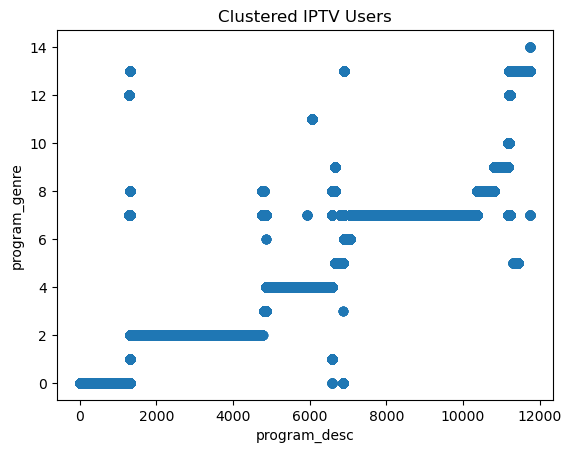

In \[78\]:

    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

In \[81\]:

    # Example 1: Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(df['program_desc'], bins=20, kde=True)  # Replace 'column_name' with the actual column name
    plt.title('Histogram of Column Name')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

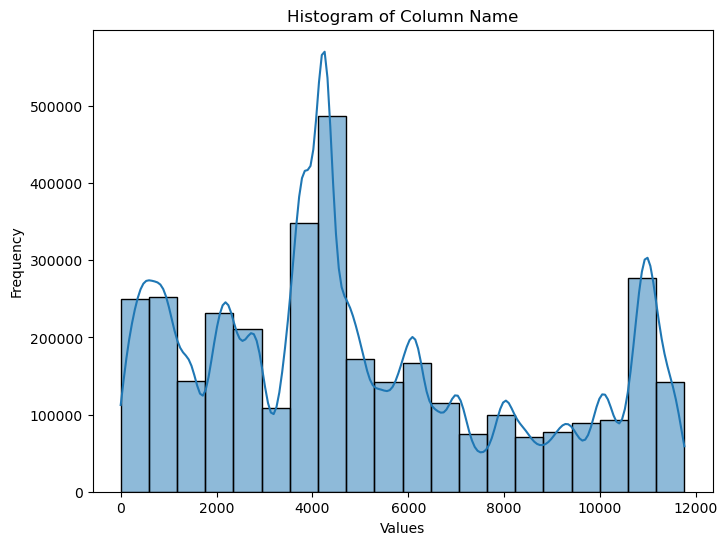

In \[ \]:

     

In \[ \]:

     

In \[ \]: